In [1]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [28]:
input_size = 2

In [33]:
class SumNet(nn.Module):
    def __init__(self, layer_sizes: list[int]):
        super(SumNet, self).__init__()
        layers = []
        assert len(layer_sizes) > 0, "One layer needed for input"
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(layer_sizes[-1], 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

[Linear(in_features=2, out_features=10, bias=True), ReLU(), Linear(in_features=10, out_features=1, bias=True)]
Epoch 1, Loss: 1.0627985000610352
Epoch 2, Loss: 0.9956619739532471
Epoch 3, Loss: 0.9321956634521484
Epoch 4, Loss: 0.8722440600395203
Epoch 5, Loss: 0.8156618475914001
Epoch 6, Loss: 0.7623118758201599
Epoch 7, Loss: 0.7120630145072937
Epoch 8, Loss: 0.6647899746894836
Epoch 9, Loss: 0.6203713417053223
Epoch 10, Loss: 0.5786889791488647
Epoch 11, Loss: 0.5396273136138916
Epoch 12, Loss: 0.5030731558799744
Epoch 13, Loss: 0.46891531348228455
Epoch 14, Loss: 0.4370437562465668
Epoch 15, Loss: 0.4073503315448761
Epoch 16, Loss: 0.3797284662723541
Epoch 17, Loss: 0.35407307744026184
Epoch 18, Loss: 0.33028095960617065
Epoch 19, Loss: 0.3082506060600281
Epoch 20, Loss: 0.28788280487060547
Epoch 21, Loss: 0.2690805494785309
Epoch 22, Loss: 0.25174960494041443
Epoch 23, Loss: 0.23579852283000946
Epoch 24, Loss: 0.22113873064517975
Epoch 25, Loss: 0.20768478512763977
Epoch 26, Loss:

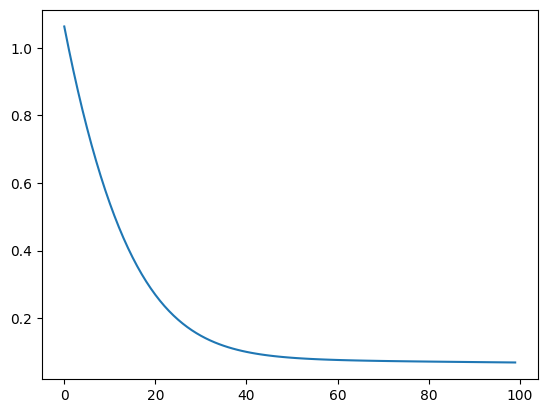

In [34]:
net = SumNet([input_size, 10])
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

x_train = torch.rand(1000, input_size)
y_train = x_train.sum(dim=1, keepdim=True) 

losses = []

for epoch in range(100):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    losses.append(loss.item())

plt.plot(losses)